In [1]:
#Assignment 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('insurance (2).xlsx')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Keep Copy of Data Frame :

In [8]:
df1 = df.copy()
df2 = df.copy()

# One Hot Encoding

In [9]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df1 = pd.get_dummies(df1,drop_first='True', dtype=int)

In [11]:
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [12]:
df1.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_male,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker_yes,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region_northwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
region_southeast,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000
region_southwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000


Separate X & Y, Train & Test

In [14]:
x1 = df1.drop('charges',axis=1)
y1 = df1['charges']

In [15]:
x1.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [16]:
y1.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x1,y1,test_size=0.3,random_state=42)

In [18]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
332,61,31.160,0,0,0,1,0,0
355,46,27.600,0,1,0,0,0,1
138,54,31.900,3,0,0,0,1,0
381,55,30.685,0,1,1,0,0,0
292,25,45.540,2,1,1,0,1,0


In [19]:
y_train.head()

332    13429.03540
355    24603.04837
138    27322.73386
381    42303.69215
292    42112.23560
Name: charges, dtype: float64

In [20]:
x_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,45,25.175,2,0,0,0,0,0
887,36,30.020,0,0,0,1,0,0
890,64,26.885,0,0,1,1,0,0
1293,46,25.745,3,1,0,1,0,0
259,19,31.920,0,1,1,1,0,0


In [21]:
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

# Multivariable Linear Regression for One Hot Encoding

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [23]:
reg.fit(x_train,y_train)

LinearRegression()

In [24]:
pred = reg.predict(x_test)
pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

In [25]:
df_pred = pd.DataFrame({'Actual': y_test, 'Prediction': pred, 'Difference': abs(y_test - pred)})
df_pred.head()

,Actual,Prediction,Difference
764,9095.06825,9016.367529,78.700721
887,5272.17580,7019.976349,1747.800549
890,29330.98315,36870.834268,7539.851118
1293,9301.89355,9518.537736,216.644186
259,33750.29180,26974.030822,6776.260978


In [26]:
m = reg.coef_
m

array([  261.29692414,   348.90691516,   424.11912829,   104.81182299,
       23628.36722236,  -486.93461047,  -970.96883857,  -926.32290791])

In [27]:
c = reg.intercept_
c

-12373.963903035477

Accuracy, Mse, Mae for Multivariable Linear Regression

In [28]:
MLR_accuracy = reg.score(x_test,y_test)
print("MLR Accuracy:", MLR_accuracy)

MLR Accuracy: 0.7696118054369012


In [29]:
MLR_mae = mean_absolute_error(y_test,pred)
print("MLR MAE:", MLR_mae)

MLR MAE: 4145.450555627585


In [30]:
MLR_mse = mean_squared_error(y_test,pred)
print("MLR MSE:", MLR_mse)

MLR MSE: 33780509.57479163


Bar-Plot

In [31]:
metrics = pd.DataFrame({'Metric': ['MLR Accuracy', 'MLR MSE', 'MLR MAE'],
                       'Value': [MLR_accuracy, MLR_mse, MLR_mae]})

df_after_pred = pd.DataFrame(data=metrics)

In [32]:
df_after_pred.head()

,Metric,Value
0,MLR Accuracy,7.696118e-01
1,MLR MSE,3.378051e+07
2,MLR MAE,4.145451e+03


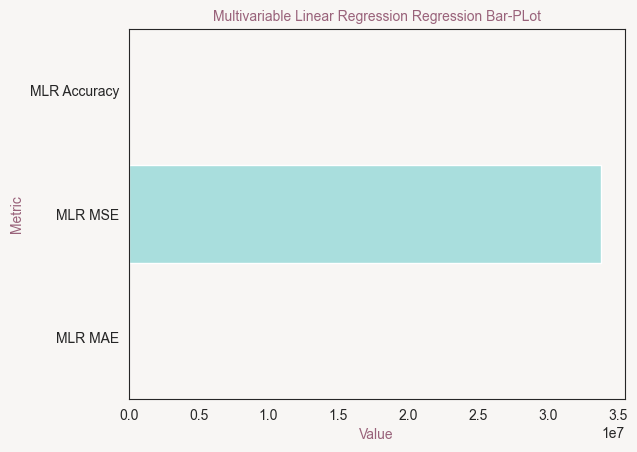

In [33]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#FFAEBC', '#A0E7E5', '#B4F8C8'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Value', y='Metric', data=df_after_pred)

plt.title("Multivariable Linear Regression Regression Bar-PLot", color="#99627A", fontsize=10)
ax.set_xlabel('Value', color='#99627A', fontsize=10)
ax.set_ylabel('Metric', color='#99627A', fontsize=10)

plt.show()

# KNN Regression for One Hot Encoding

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [35]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [36]:
knn_pred = knn.predict(x_test)
knn_pred

array([ 8312.86098 ,  8141.9279  , 19835.69166 , 12096.26233 ,
       15332.645516, 13943.360824,  4275.35308 , 14203.61247 ,
        5834.64159 , 15200.550406, 10427.38582 , 13387.24886 ,
       13033.18345 , 23857.00397 , 29564.924988, 16020.70195 ,
       24208.68843 , 25361.019618, 17847.351064,  9974.30213 ,
       14758.742604, 14570.53906 ,  1794.02622 ,  9431.63652 ,
       12413.456106, 11018.87098 , 17656.342546,  8286.929408,
       15367.30424 ,  5704.45109 ,  7729.76777 , 11923.9141  ,
        7268.63136 ,  9506.14603 ,  2882.80246 , 16802.621192,
        5145.40773 , 18645.216144, 13480.09491 , 28437.513506,
       10004.054242,  8468.02643 , 20077.170622, 15723.159074,
        5102.62973 , 12429.37582 ,  7761.277974, 13826.077354,
       18661.073538, 18302.42008 , 17655.668242,  7675.132008,
        6125.34827 ,  4534.1972  , 24414.39178 , 16184.4235  ,
        3809.08565 ,  8006.3826  , 11941.95757 , 16813.12174 ,
       13729.40889 , 12698.954634, 35737.424848, 12971.

Accuracy, MSE, MAE for KNN Classification

In [37]:
knn_accuracy = r2_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.1926782639344864


In [38]:
knn_mse = mean_squared_error(y_test, knn_pred)
print("KNN MSE:", knn_mse)

KNN MSE: 118372990.79849027


In [39]:
knn_mae = mean_absolute_error(y_test, knn_pred)
print("KNN MAE:", knn_mae)

KNN MAE: 7571.1468788134325


Bar-Plot

In [40]:
data = {'Variable':['KNN MAE','KNN MSE','KNN Accuracy'],
         'Accuracy':[knn_mae,knn_mse,knn_accuracy]}
df_after_KNN_pred = pd.DataFrame(data=data)

In [41]:
df_after_KNN_pred.head()

,Variable,Accuracy
0,KNN MAE,7.571147e+03
1,KNN MSE,1.183730e+08
2,KNN Accuracy,1.926783e-01


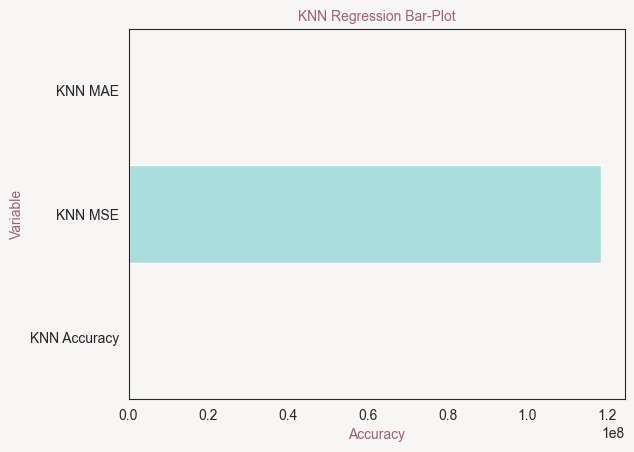

In [42]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#FFAEBC', '#A0E7E5', '#B4F8C8'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Variable', data=df_after_KNN_pred)

plt.title("KNN Regression Bar-Plot", color="#99627A", fontsize=10)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=10)
ax.set_ylabel('Variable', color='#99627A', fontsize=10)

plt.show()

# Compare One Hot Encoding : Multivariable Linear Regression VS KNN Regression

In [43]:
linear_data = {'Variable': ['Multivariable Linear Regression MAE', 'Multivariable Linear Regression MSE', 'Multivariable Linear Regression Accuracy'],
                 'Accuracy': [MLR_mae, MLR_mse, MLR_accuracy]}
df_after_pred = pd.DataFrame(data=linear_data)

knn_data = {'Variable': ['KNN Regression MAE', 'KNN Regression MSE', 'KNN Regression Accuracy'],
            'Accuracy': [knn_mae, knn_mse, knn_accuracy]}
df_after_KNN_pred = pd.DataFrame(data=knn_data)


result_df = pd.concat([df_after_pred, df_after_KNN_pred], axis=0)
result_df

,Variable,Accuracy
0,Multivariable Linear Regression MAE,4.145451e+03
1,Multivariable Linear Regression MSE,3.378051e+07
2,Multivariable Linear Regression Accuracy,7.696118e-01
0,KNN Regression MAE,7.571147e+03
1,KNN Regression MSE,1.183730e+08
2,KNN Regression Accuracy,1.926783e-01


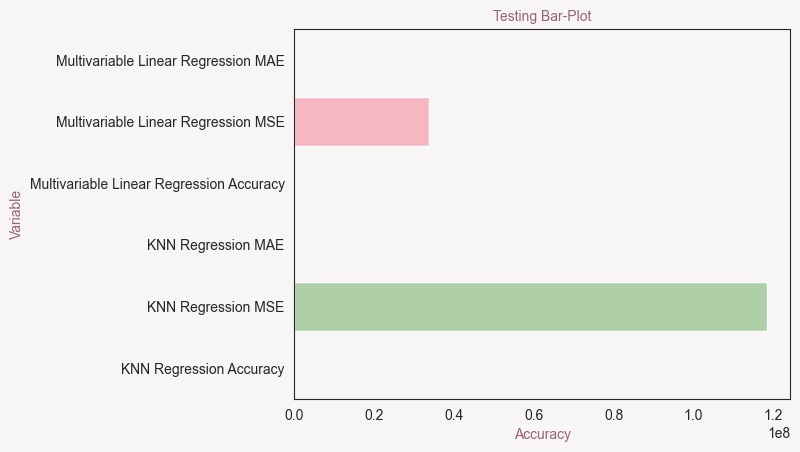

In [44]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#643A6B', '#FFAEBC', '#A0E7E5', '#B4F8C8', '#AAD6A0', '#FBE7C6', '#FFA384'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Variable', data=result_df)

plt.title("Testing Bar-Plot", color="#99627A", fontsize=10)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=10)
ax.set_ylabel('Variable', color='#99627A', fontsize=10)

plt.show()

# Label Encoding

In [45]:
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [48]:
for col in df.columns:
    if not is_numeric_dtype(df[col]):
        df[col] = le.fit_transform(df[col])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [49]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Separate X & Y, Train & Test

In [51]:
x = df.drop('charges',axis=1)
y = df['charges']

In [52]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [53]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [55]:
xtrain.head()

,age,sex,bmi,children,smoker,region
332,61,0,31.160,0,0,1
355,46,1,27.600,0,0,3
138,54,0,31.900,3,0,2
381,55,1,30.685,0,1,0
292,25,1,45.540,2,1,2


In [56]:
ytrain.head()

332    13429.03540
355    24603.04837
138    27322.73386
381    42303.69215
292    42112.23560
Name: charges, dtype: float64

In [57]:
xtest.head()

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,0
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1


In [58]:
ytest.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

# Data Visualization

<Figure size 2800x1800 with 0 Axes>

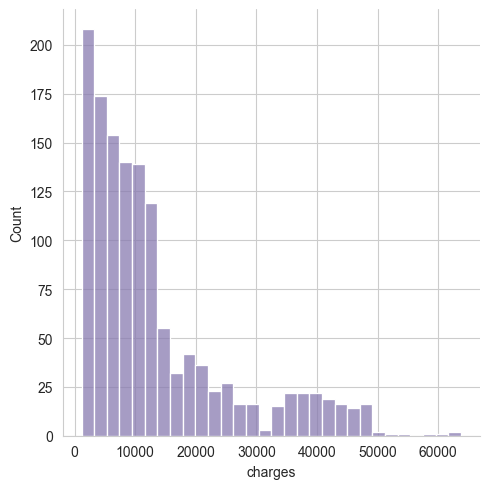

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(28, 18))
sns.displot(df["charges"], color='#887BB0', palette=["#887BB0"])

<Axes: >

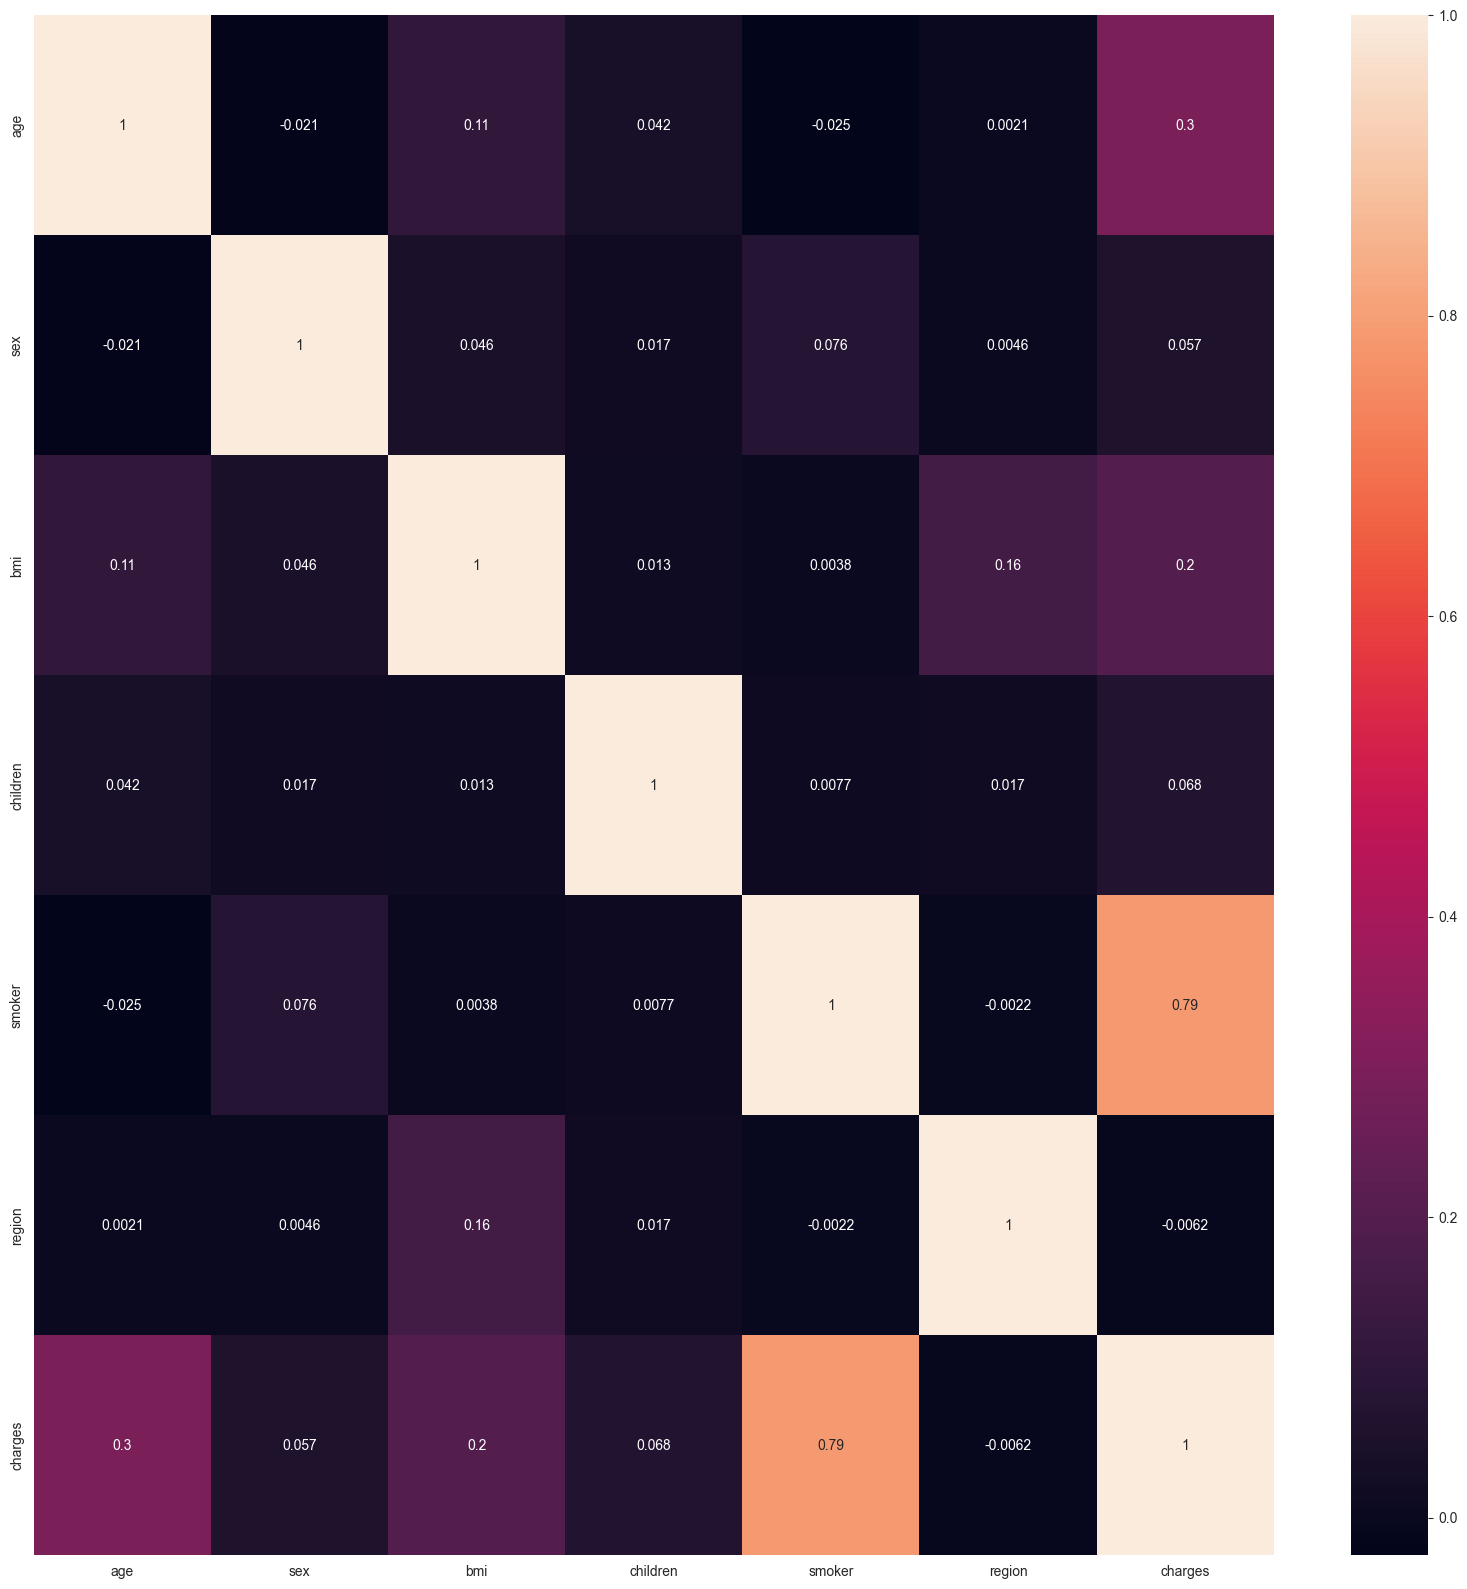

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Multivariable Linear Regression for Label Encoding

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [62]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [63]:
pred = reg.predict(xtest)
pred

array([ 8.93142116e+03,  7.07090670e+03,  3.69370805e+04,  9.59699214e+03,
        2.70083549e+04,  1.08664849e+04,  3.74610217e+01,  1.72228092e+04,
        9.18308115e+02,  1.13965537e+04,  2.79154456e+04,  9.53381323e+03,
        5.18928014e+03,  3.86124990e+04,  4.05094490e+04,  3.72748566e+04,
        1.53562559e+04,  3.59449407e+04,  9.10631783e+03,  3.14429410e+04,
        3.66298253e+03,  1.00966745e+04,  2.21091896e+03,  7.10598084e+03,
        1.13521417e+04,  1.30231210e+04,  1.44472857e+04,  6.12031303e+03,
        9.94564893e+03,  2.18617424e+03,  8.91389260e+03,  1.31869496e+04,
        4.49110116e+03,  3.30469662e+03,  4.32885102e+03,  1.32330189e+04,
        1.67071398e+03,  8.63238607e+03,  3.32727214e+04,  3.26840062e+04,
        3.60294190e+03,  4.40040903e+03,  1.40663345e+04,  1.16268203e+04,
        8.89219642e+03,  1.21011367e+04,  5.23906853e+03,  2.84241293e+03,
        3.56294259e+04,  9.27854339e+03,  1.59720792e+04,  2.34524488e+03,
        1.24695907e+04,  

In [64]:
df_pred = pd.DataFrame({'Actual': ytest, 'Prediction': pred, 'Difference': abs(ytest - pred)})
df_pred.head()

,Actual,Prediction,Difference
764,9095.06825,8931.421164,163.647086
887,5272.17580,7070.906703,1798.730903
890,29330.98315,36937.080496,7606.097346
1293,9301.89355,9596.992144,295.098594
259,33750.29180,27008.354871,6741.936929


In [65]:
m = reg.coef_
m

array([  261.62568984,   109.64719595,   344.54483066,   424.37016596,
       23620.80252148,  -326.46262527])

In [66]:
c = reg.intercept_
c

-12364.391322279236

In [67]:
reg.score(xtest,ytest)

0.7694415927057693

Accuracy, Mse, Mae for Multivariable Linear Regression

In [68]:
MLR_accuracy = reg.score(xtest,ytest)
print("MLR Accuracy:", MLR_accuracy)

MLR Accuracy: 0.7694415927057693


In [69]:
MLR_mae = mean_absolute_error(ytest,pred)
print("MLR MAE:", MLR_mae)

MLR MAE: 4155.239843059379


In [70]:
MLR_mse = mean_squared_error(ytest,pred)
print("MLR MSE:", MLR_mse)

MLR MSE: 33805466.89868861


Bar-Plot

In [71]:
metrics = pd.DataFrame({'Metric': ['MLR Accuracy', 'MLR MSE', 'MLR MAE'],
                       'Value': [MLR_accuracy, MLR_mse, MLR_mae]})

df_after_pred = pd.DataFrame(data=metrics)

In [72]:
df_after_pred.head()

,Metric,Value
0,MLR Accuracy,7.694416e-01
1,MLR MSE,3.380547e+07
2,MLR MAE,4.155240e+03


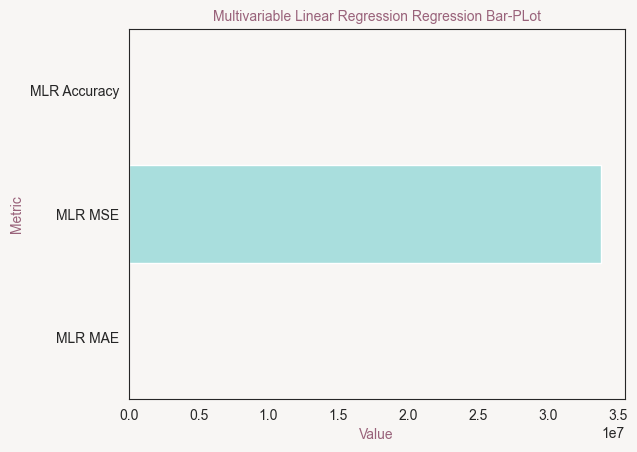

In [73]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#FFAEBC', '#A0E7E5', '#B4F8C8'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Value', y='Metric', data=df_after_pred)

plt.title("Multivariable Linear Regression Regression Bar-PLot", color="#99627A", fontsize=10)
ax.set_xlabel('Value', color='#99627A', fontsize=10)
ax.set_ylabel('Metric', color='#99627A', fontsize=10)

plt.show()

# KNN Regression for Label Encoding

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [75]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [76]:
knn_pred = knn.predict(xtest)
knn_pred

array([ 8690.43237 , 19000.16927 , 19835.69166 , 15209.38903 ,
       15332.645516,  6525.942014,  4275.35308 , 14202.57553 ,
        6044.87565 , 15200.550406, 10487.66144 , 13595.2385  ,
       12801.05156 , 23857.00397 , 29564.924988, 16020.70195 ,
       24143.46537 , 19088.256672, 17847.351064,  9918.63693 ,
        9286.04842 , 14472.15013 ,  1627.55524 ,  2544.62533 ,
       12413.456106, 17581.24919 , 34112.849818,  8286.929408,
       12431.23215 ,  8088.37853 ,  7413.34909 , 11960.6391  ,
       13805.84869 ,  9506.14603 ,  9334.3847  , 16802.621192,
        4594.8149  , 13751.54542 , 15577.78199 , 21551.112746,
        9230.250542, 11480.063572, 19879.198482, 12210.98625 ,
        4868.64141 , 12551.43548 , 14276.867414,  9853.244876,
        9877.781954, 14340.699784, 13927.53963 ,  4905.02386 ,
        5910.06901 ,  4655.35675 , 24524.60521 , 16408.66096 ,
        7796.21453 ,  8006.3826  , 26704.391698, 17149.98228 ,
       22909.713106, 12698.954634, 32731.46857 , 12971.

Accuracy, MSE, MAE for KNN Classification

In [77]:
knn_accuracy = r2_score(ytest, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.1267185153831346


In [78]:
knn_mse = mean_squared_error(ytest, knn_pred)
print("KNN MSE:", knn_mse)

KNN MSE: 128044293.27870281


In [79]:
knn_mae = mean_absolute_error(ytest, knn_pred)
print("KNN MAE:", knn_mae)

KNN MAE: 7888.692017271144


Bar-Plot

In [80]:
data = {'Variable':['KNN MAE','KNN MSE','KNN Accuracy'],
         'Accuracy':[knn_mae,knn_mse,knn_accuracy]}
df_after_KNN_pred = pd.DataFrame(data=data)

In [81]:
df_after_KNN_pred.head()

,Variable,Accuracy
0,KNN MAE,7.888692e+03
1,KNN MSE,1.280443e+08
2,KNN Accuracy,1.267185e-01


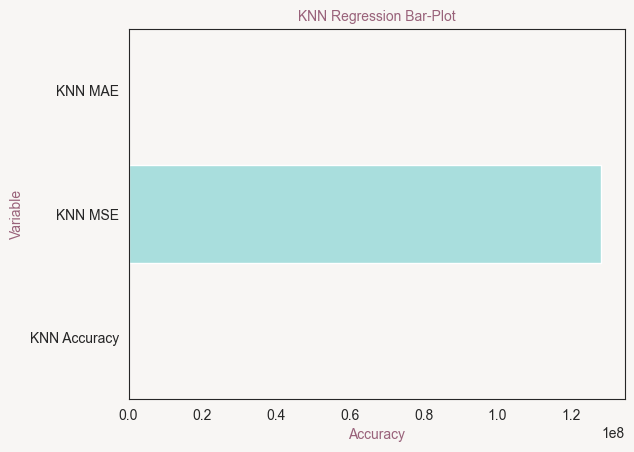

In [82]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#FFAEBC', '#A0E7E5', '#B4F8C8'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Variable', data=df_after_KNN_pred)

plt.title("KNN Regression Bar-Plot", color="#99627A", fontsize=10)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=10)
ax.set_ylabel('Variable', color='#99627A', fontsize=10)

plt.show()

# Compare Label Encoding : Multivariable Linear Regression VS KNN Regression

In [83]:
linear_data = {'Variable': ['Multivariable Linear Regression MAE', 'Multivariable Linear Regression MSE', 'Multivariable Linear Regression Accuracy'],
                 'Accuracy': [MLR_mae, MLR_mse, MLR_accuracy]}
df_after_pred = pd.DataFrame(data=linear_data)

knn_data = {'Variable': ['KNN Regression MAE', 'KNN Regression MSE', 'KNN Regression Accuracy'],
            'Accuracy': [knn_mae, knn_mse, knn_accuracy]}
df_after_KNN_pred = pd.DataFrame(data=knn_data)


result_df = pd.concat([df_after_pred, df_after_KNN_pred], axis=0)
result_df

,Variable,Accuracy
0,Multivariable Linear Regression MAE,4.155240e+03
1,Multivariable Linear Regression MSE,3.380547e+07
2,Multivariable Linear Regression Accuracy,7.694416e-01
0,KNN Regression MAE,7.888692e+03
1,KNN Regression MSE,1.280443e+08
2,KNN Regression Accuracy,1.267185e-01


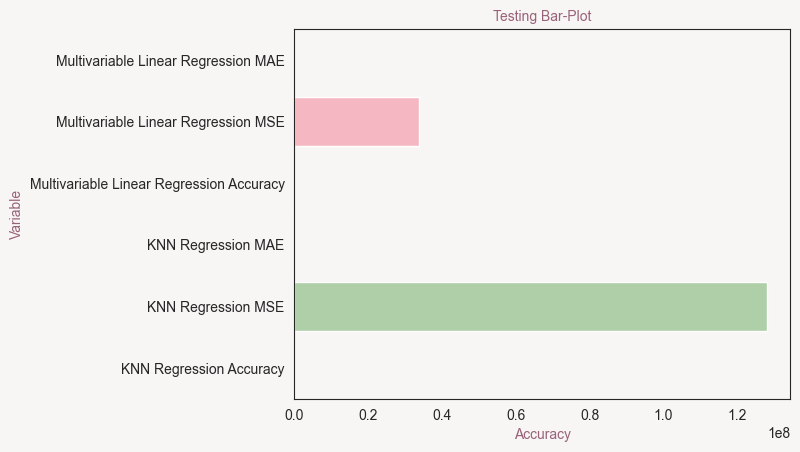

In [84]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#643A6B', '#FFAEBC', '#A0E7E5', '#B4F8C8', '#AAD6A0', '#FBE7C6', '#FFA384'])

fig = plt.gcf()
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Variable', data=result_df)

plt.title("Testing Bar-Plot", color="#99627A", fontsize=10)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=10)
ax.set_ylabel('Variable', color='#99627A', fontsize=10)

plt.show()

In [85]:
#The End